In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix




In [2]:
# Load the dataset
df = pd.read_csv("predictive_maintenance.csv")



In [3]:
# Display the first few rows of the dataframe
print(df.head())



    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    78     L47257    L                298.8                    308.9   
1  1088     H30501    H                296.9                    307.8   
2  1510     L48689    L                298.0                    308.5   
3  1683     H31096    H                297.9                    307.4   
4  1764     L48943    L                298.2                    307.6   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                    1455         41.3              208       1   
1                    1549         35.8              206       1   
2                    1429         37.7              220       1   
3                    1604         36.1              225       1   
4                    1511         31.0              209       1   

        Failure Type  
0  Tool Wear Failure  
1  Tool Wear Failure  
2  Tool Wear Failure  
3  Tool Wear Failure  
4  Tool Wear Failure  


In [4]:
# Summary statistics
print(df.describe())



               UDI  Air temperature [K]  Process temperature [K]  \
count   799.000000           799.000000               799.000000   
mean   2203.874844           299.377347               309.334793   
std    2710.242942             1.968244                 1.294974   
min       1.000000           295.600000               306.100000   
25%     200.500000           298.000000               308.400000   
50%     400.000000           298.700000               308.700000   
75%    4328.000000           300.800000               310.300000   
max    9975.000000           304.400000               313.700000   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]      Target  
count              799.000000   799.000000       799.000000  799.000000  
mean              1518.566959    44.195995       120.140175    0.424280  
std                279.239246    13.716978        70.173168    0.494543  
min               1181.000000     3.800000         0.000000    0.000000  
25%              

In [5]:
# Check for missing values
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


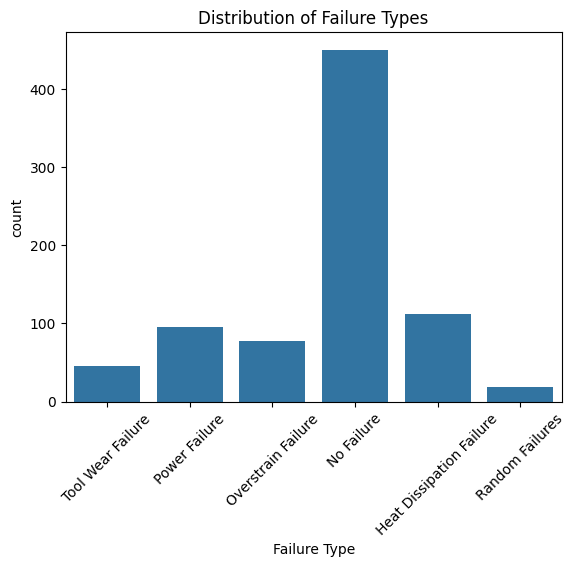

In [6]:
# Visualize the distribution of the target variable
sns.countplot(x='Failure Type', data=df)
plt.title('Distribution of Failure Types')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()


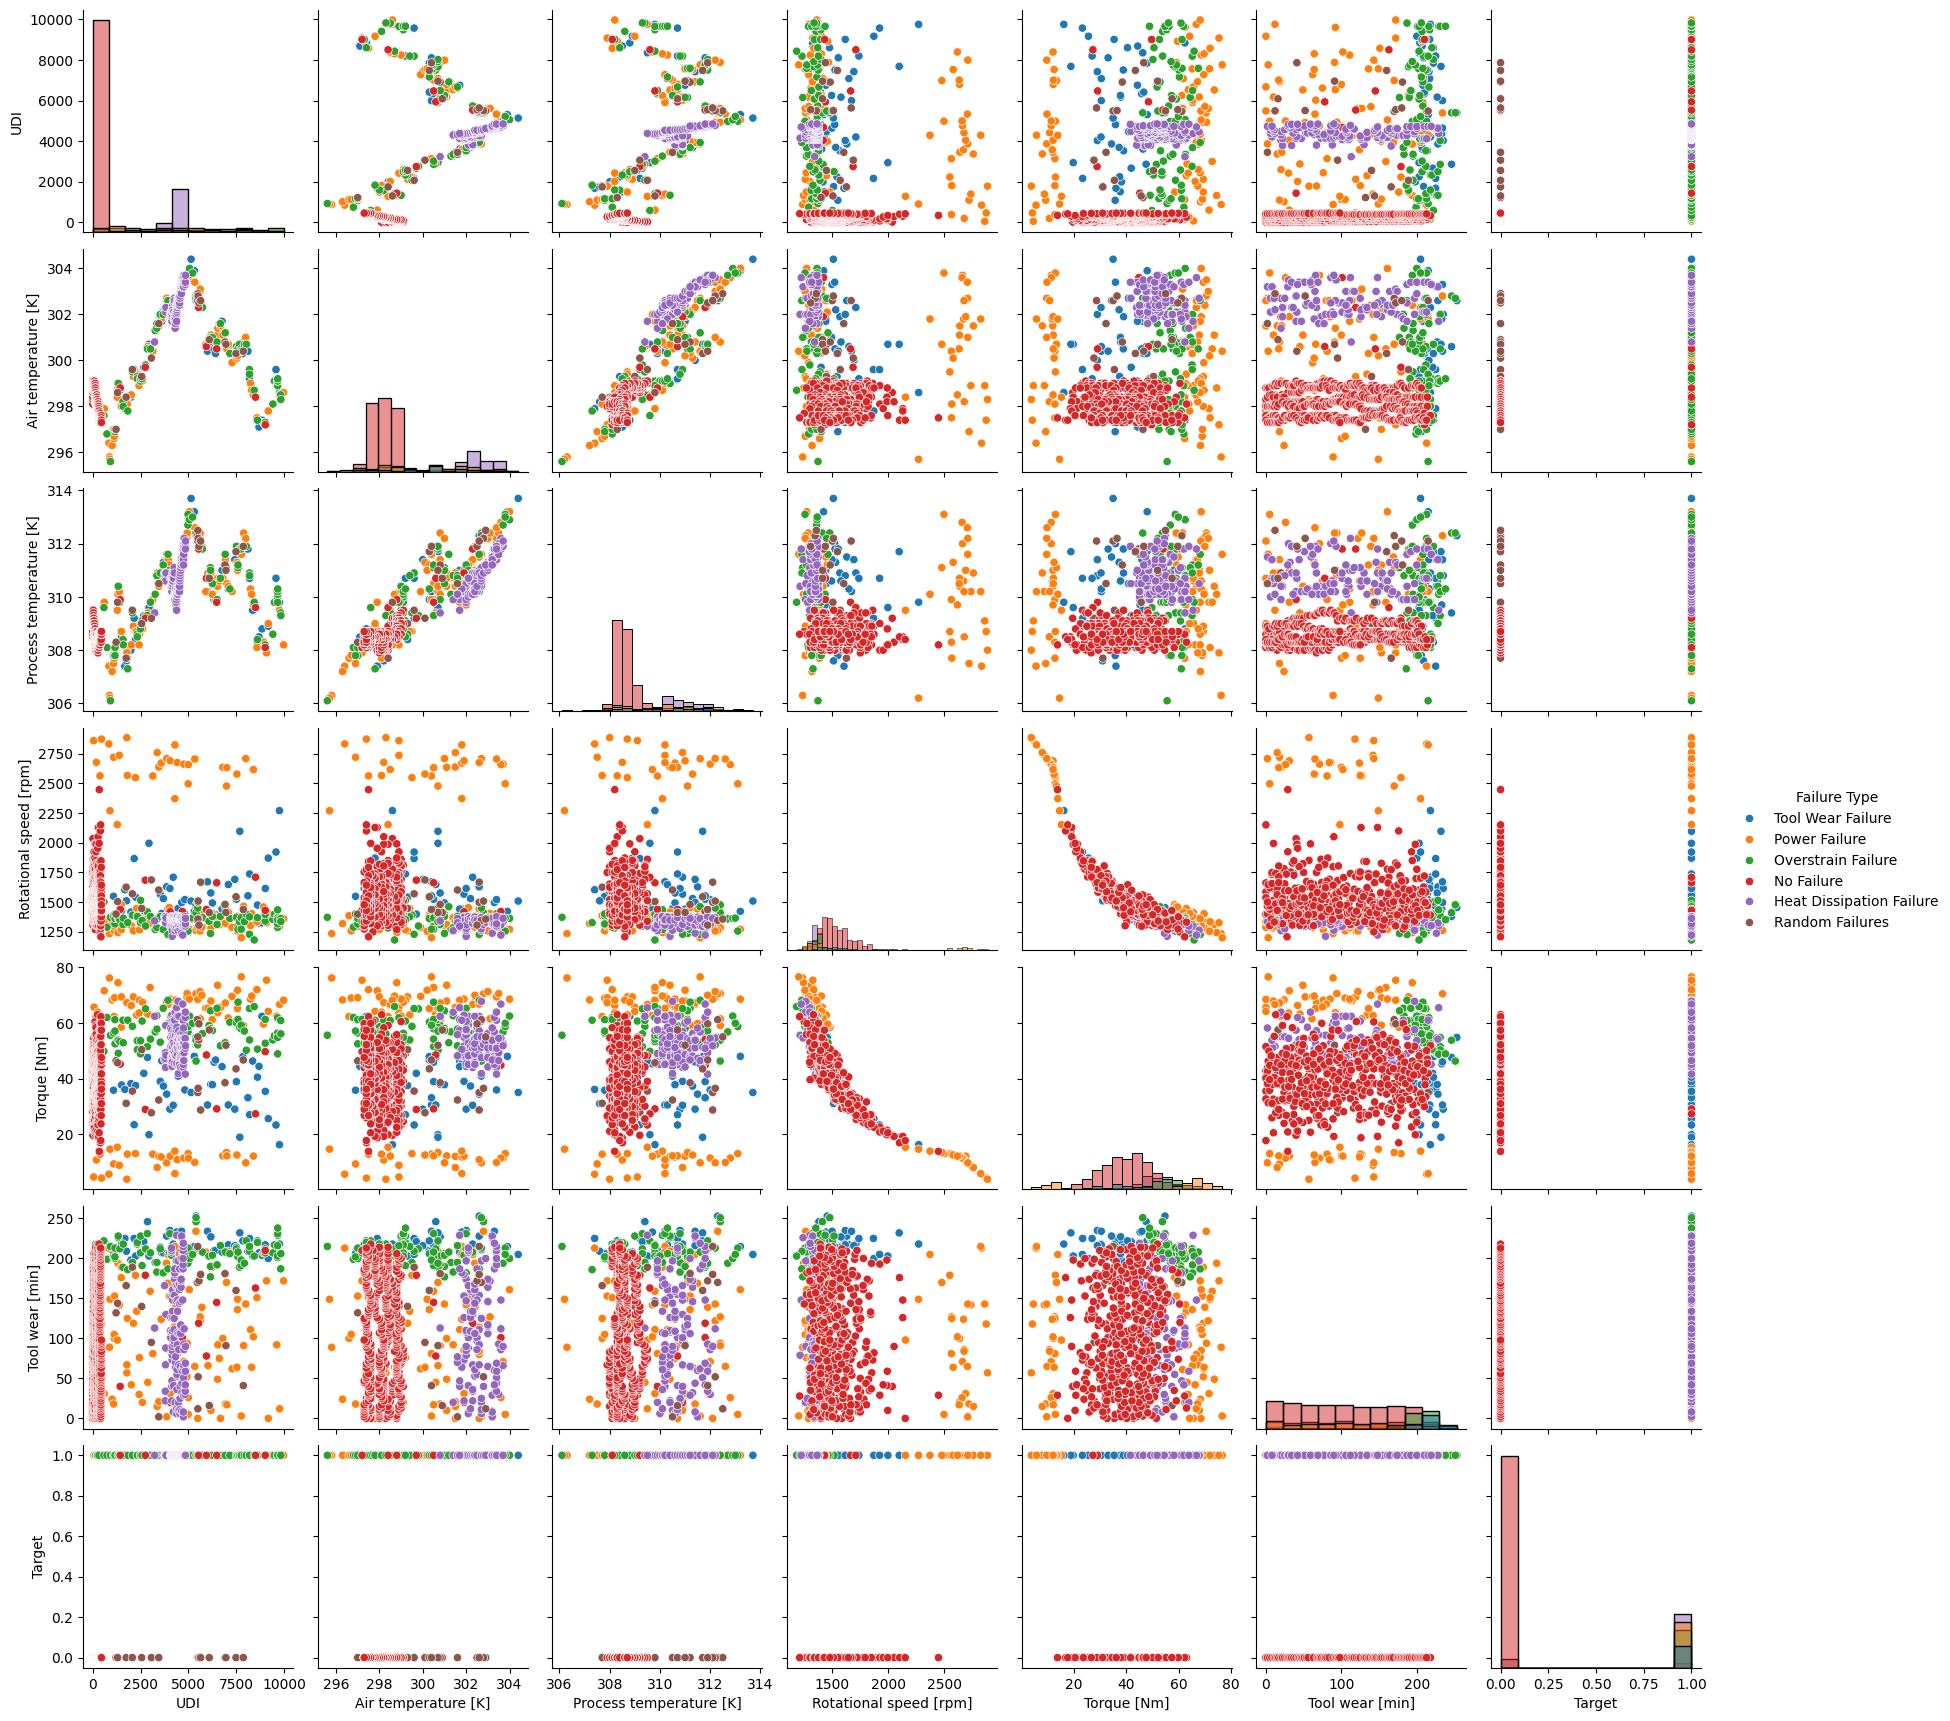

In [7]:
# Visualize relationships between numerical features and target variable
sns.pairplot(df, hue='Failure Type', diag_kind='hist')
plt.show()

In [8]:
# Drop 'UDI' column
df.drop(columns=['UDI'], inplace=True)

In [9]:
# Encode 'Failure Type' variable
failure_type_map = {
    'Tool_Wear_Failure': 0,
    'Power_Failure': 1,
    'Overstrain_Failure': 2,
    'Heat_Dissipation_Failure': 3,
    'no_failure': 4,
    'random_failure': 5
}

In [10]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Failure Type'])
y = df['Failure Type']


In [11]:
X

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L47257,L,298.8,308.9,1455,41.3,208,1
1,H30501,H,296.9,307.8,1549,35.8,206,1
2,L48689,L,298.0,308.5,1429,37.7,220,1
3,H31096,H,297.9,307.4,1604,36.1,225,1
4,L48943,L,298.2,307.6,1511,31.0,209,1
...,...,...,...,...,...,...,...,...
794,M15312,M,297.4,308.6,1643,31.0,89,0
795,L47633,L,297.4,308.7,1510,36.2,92,0
796,L47634,L,297.4,308.7,1468,46.6,94,0
797,L47635,L,297.4,308.7,1429,57.4,96,0


In [12]:
y


0      Tool Wear Failure
1      Tool Wear Failure
2      Tool Wear Failure
3      Tool Wear Failure
4      Tool Wear Failure
             ...        
794           No Failure
795           No Failure
796           No Failure
797           No Failure
798           No Failure
Name: Failure Type, Length: 799, dtype: object

In [13]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Define preprocessing steps for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessing for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Model 1: Random Forest
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [17]:
model_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Product ID', 'Type'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [18]:
y_pred_rf = model_rf.predict(X_test)


In [19]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

In [20]:
# Display results
print("Model: Random Forest")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(confusion_rf)
print("\n")

Model: Random Forest
Accuracy: 0.95
Confusion Matrix:
[[21  0  1  0  0  0]
 [ 0 92  0  1  0  0]
 [ 1  0 11  0  0  0]
 [ 2  0  2 18  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0  8]]




In [21]:
# Model 2: Gradient Boosting
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])
model_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Product ID', 'Type'], dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

In [22]:
y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)


In [23]:

print("Model: Gradient Boosting")
print(f"Accuracy: {accuracy_gb}")
print("Confusion Matrix:")
print(confusion_gb)
print("\n")


Model: Gradient Boosting
Accuracy: 0.95625
Confusion Matrix:
[[21  0  1  0  0  0]
 [ 0 93  0  0  0  0]
 [ 1  0 11  0  0  0]
 [ 0  1  1 20  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  1  0  0  8]]




In [24]:
# Model 3: Support Vector Machine
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
model_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Product ID', 'Type'], dtype='object'))])),
                ('classifier', SVC())])

In [25]:
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

In [26]:

print("Model: Support Vector Machine")
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(confusion_svm)
print("\n")

Model: Support Vector Machine
Accuracy: 0.93125
Confusion Matrix:
[[21  0  1  0  0  0]
 [ 0 93  0  0  0  0]
 [ 1  0 11  0  0  0]
 [ 1  1  5 15  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  2  0  0  7]]




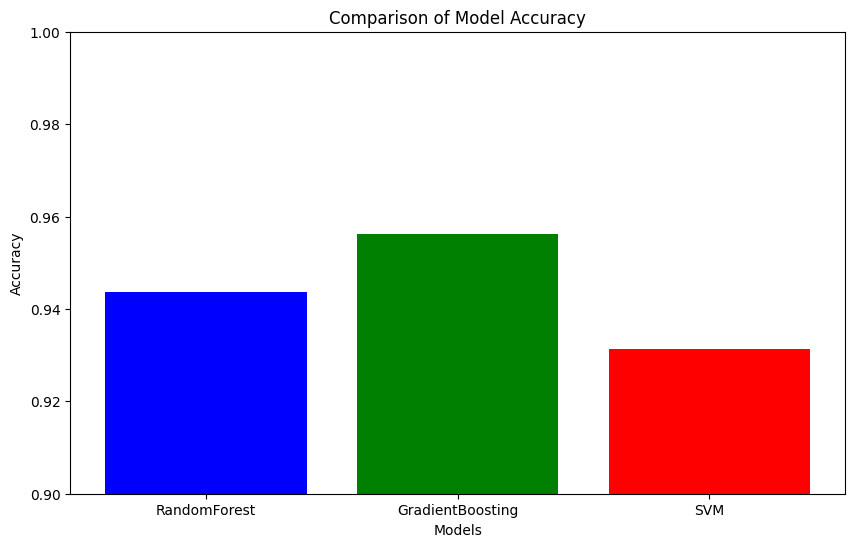

In [27]:
# Define the models
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Train and evaluate the models
accuracy_results = {}  # Dictionary to store accuracy results
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy  # Store accuracy for each model

# Create a bar plot of accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.show()

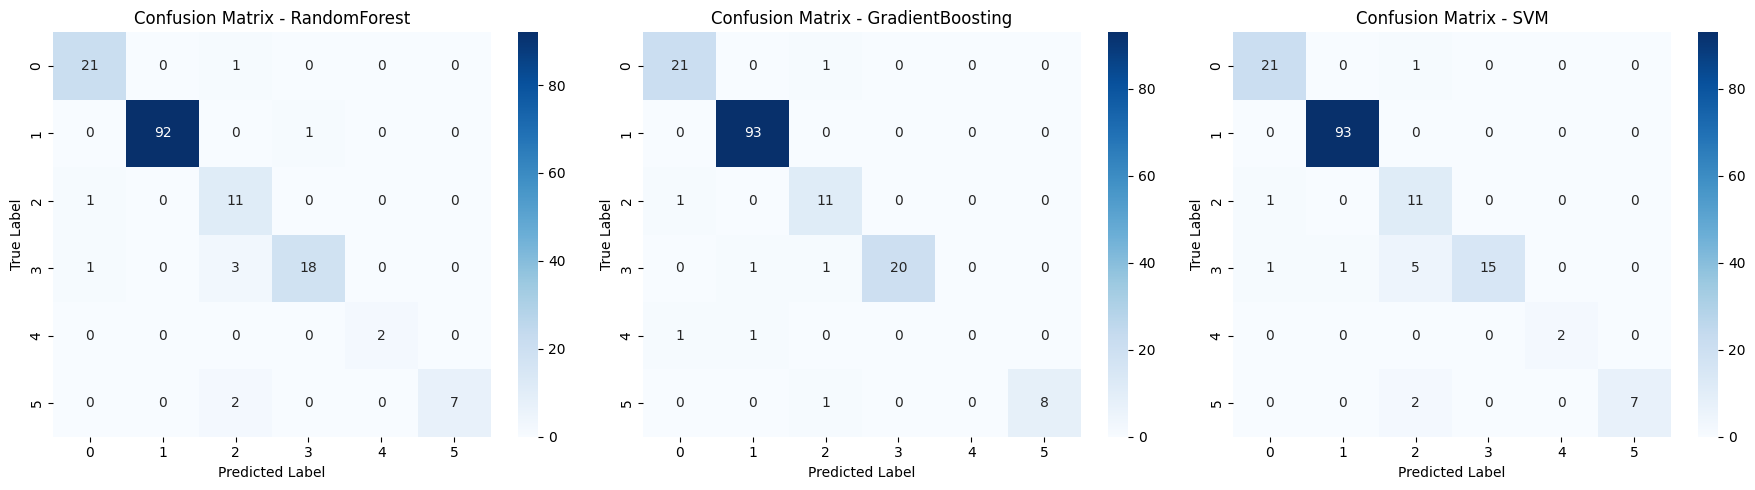

In [28]:
import seaborn as sns

# Train and evaluate the models
confusion_matrices = {}  # Dictionary to store confusion matrices
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = confusion  # Store confusion matrix for each model

# Plot confusion matrices
plt.figure(figsize=(18, 5))
for i, (name, confusion) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(1, len(confusion_matrices), i)
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [29]:
from joblib import dump

# Train the Gradient Boosting model
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])
model_gb.fit(X_train, y_train)

# Dump the model to a pickle file
dump(model_gb, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

In [30]:
from joblib import load

# Load the model from the pickle file
model_gb_loaded = load('gradient_boosting_model.pkl')
# Sample new data with 'Target' column
new_data = pd.DataFrame({
    'Air temperature [K]': [299.0, 298.5, 301.2],
    'Process temperature [K]': [309.0, 307.5, 310.2],
    'Rotational speed [rpm]': [1500, 1450, 1550],
    'Torque [Nm]': [45.0, 40.0, 50.0],
    'Tool wear [min]': [150, 160, 140],
    'Product ID': ['L47257', 'H30501', 'L48689'],  # Sample values for 'Product ID'
    'Type': ['L', 'H', 'L'],  # Sample values for 'Type'
    'Target': [0, 1, 0]  # Binary values (0 or 1) for the 'Target' column
})

In [31]:
new_data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Product ID,Type,Target
0,299.0,309.0,1500,45.0,150,L47257,L,0
1,298.5,307.5,1450,40.0,160,H30501,H,1
2,301.2,310.2,1550,50.0,140,L48689,L,0


In [32]:
X_test


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
695,M15211,M,297.6,308.4,1611,31.0,48,0
666,L47501,L,297.8,308.4,1518,32.5,190,0
63,L48464,L,298.4,309.5,2153,15.3,98,1
533,M15042,M,298.1,308.2,1342,48.1,54,0
66,M16352,M,298.0,308.7,1479,58.5,176,1
...,...,...,...,...,...,...,...,...
589,M15100,M,298.0,308.1,1339,51.6,197,0
797,L47635,L,297.4,308.7,1429,57.4,96,0
743,L47580,L,297.4,308.5,2100,16.9,176,0
513,L47339,L,298.4,308.2,1471,47.0,214,0


In [33]:
predictions = model_gb_loaded.predict(X_test)

# Display the predictions
for pred in predictions:
    if pred == 4:  # 'no_failure' label
        print("No maintenance needed, no failure")
    else:
        print(f"Failure type: {pred}, maintenance needed")

Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: Power Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: Heat Dissipation Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: Power Failure, maintenance needed
Failure type: Heat Dissipation Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: Power Failure, maintenance needed
Failure type: Heat Dissipation Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: Heat Dissipation Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenance needed
Failure type: No Failure, maintenan